In [11]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
# tinh toan khoang cach cap diem trong 2 tap hop hieu qua 
from scipy.spatial.distance import cdist
#print(np.random.seed(11))

None


In [30]:
# 3 center
means = [[2,2], [8,3], [3,6]]
# khoi tao ma tran hiep phuong sai la ma tran don vi
cov = [[1,0], [0,1]]
# so du lieu moi cluster
N=500
# khoi tao cac cluster
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# join
X = np.concatenate((X0,X1,X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_label)

[0 0 0 ... 2 2 2]


Hien thi du lieu

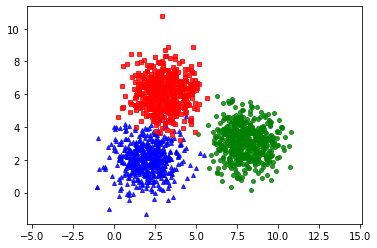

In [31]:
def kmeans_display(X, label):
  K = np.amax(label) +1
  X0 = X[label == 0,:]
  X1 = X[label == 1,:]
  X2 = X[label == 2, :]

  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=4, alpha =.8)
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=4, alpha =.8)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=4, alpha =.8)
  # thiet lap ti le 2 cot bang nhau
  plt.axis('equal')
  plt.plot()
  plt.show()

kmeans_display(X,original_label)

In [27]:
# khoi tao center ban dau
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers [chọn ngẫu nhiên k hàng X làm tâm ban đầu] x
    return X[np.random.choice(X.shape[0], k, replace=False)]
# gan nhan moi cho cac diem khi biet conter
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw [tính toán khoảng cách theo cặp btw] x data and centers
    D = cdist(X, centers)
    # return index of the closest center [chỉ mục trả về của trung tâm gần nhất] x
    return np.argmin(D, axis = 1)
# để cập nhật các centers mới dua trên dữ liệu vừa được gán nhãn.
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster [thu thập tất cả các điểm được giao cho cụm thứ k] x 
        Xk = X[labels == k, :]
        # take average [lấy trung bình] x
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers
# kiem tra dieu kiem dung cua thuat toan
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same [trả về True nếu hai tập trung tâm giống nhau] x
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [43]:
def kmeans(X,K):
  centers = [kmeans_init_centers(X,K)]
  labels = []
  it =0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1],K)
    if has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1
  return (centers, labels, it)



In [46]:
def loss(label, original_label):
  l =0
  for i in range(len(original_label)):
    if label[i] != original_label[i]:
      l +=1
  return l

Centers found by our algorithm: 
[[8.03195207 3.07795748]
 [3.06047309 6.07366595]
 [2.00314952 2.0258537 ]]
22


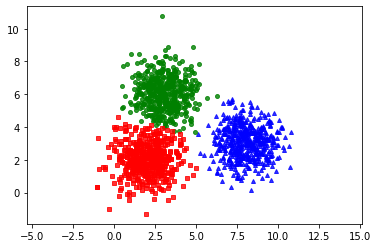

In [52]:
(centers, labels, it) = kmeans(X,K)
print('Centers found by our algorithm: ')
print(centers[-1])

original_label = np.asarray([2]*N + [0]*N + [1]*N).T
print(loss(labels[-1],original_label))

kmeans_display(X, labels[-1])

Kết quả tìm được bằng thư viện scikit-learn

Center found by sckit-learn:
[[3.06047309 6.07366595]
 [2.00314952 2.0258537 ]
 [8.03195207 3.07795748]]


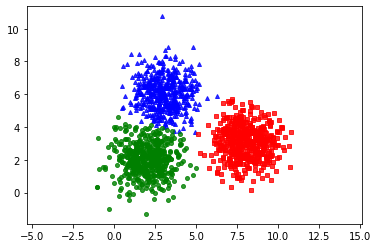

In [40]:
from sklearn.cluster import KMeans
# khoi tao model va fit du lieu 
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Center found by sckit-learn:')
print(kmeans.cluster_centers_)
# prediction du lieu
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)